In [ ]:
#hide
from SSLRS.core import *

# Project name here

> Summary description here.

This file will become your README and also the index of your documentation.

## Install

`pip install your_project_name`

## How to use

Fill me in please! Don't forget code examples:

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision.all import get_files
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import skimage.io as skio

In [ ]:
with open('./data/BigEarthNet-S2_19-classes_models/label_indices.json', 'rb') as f:
    label_indices = json.load(f)
label_conversion = label_indices['label_conversion']
BigEarthNet_19_label_idx = {v: k for k, v in label_indices['BigEarthNet-19_labels'].items()}


In [ ]:
def get_label(patch_json):
    original_labels = patch_json['labels']
    original_labels_multi_hot = np.zeros(
    len(label_indices['original_labels'].keys()), dtype=int)
    BigEarthNet_19_labels_multi_hot = np.zeros(len(label_conversion),dtype=int)
    for label in original_labels:
        original_labels_multi_hot[label_indices['original_labels'][label]] = 1

    for i in range(len(label_conversion)):
        BigEarthNet_19_labels_multi_hot[i] = (
                np.sum(original_labels_multi_hot[label_conversion[i]]) > 0
            ).astype(int)

    BigEarthNet_19_labels = []
    for i in np.where(BigEarthNet_19_labels_multi_hot == 1)[0]:
#         BigEarthNet_19_labels.append(BigEarthNet_19_label_idx[i])
        BigEarthNet_19_labels.append(i)
    return BigEarthNet_19_labels


In [ ]:
BigEarthNet_19_label_idx

{0: 'Urban fabric',
 1: 'Industrial or commercial units',
 2: 'Arable land',
 3: 'Permanent crops',
 4: 'Pastures',
 5: 'Complex cultivation patterns',
 6: 'Land principally occupied by agriculture, with significant areas of natural vegetation',
 7: 'Agro-forestry areas',
 8: 'Broad-leaved forest',
 9: 'Coniferous forest',
 10: 'Mixed forest',
 11: 'Natural grassland and sparsely vegetated areas',
 12: 'Moors, heathland and sclerophyllous vegetation',
 13: 'Transitional woodland, shrub',
 14: 'Beaches, dunes, sands',
 15: 'Inland wetlands',
 16: 'Coastal wetlands',
 17: 'Inland waters',
 18: 'Marine waters'}

In [ ]:
pp='./data/BigEarthNet-v1.0/'

In [ ]:
jsons=get_files(pp,extensions='.json')

In [ ]:
from fastcore.parallel import parallel
from skimage.transform import rescale

In [ ]:
files=[]
labels=[]
# parallel(pp,jsons[:1000],progress=True)
for js in tqdm.tqdm(jsons):
    with open(js, 'rb') as f:
        patch_json = json.load(f)
    newlables=get_label(patch_json)
    if len(newlables)==1:
#         print(js)
        files.append(js)
        labels.append(newlables)

100%|██████████| 590326/590326 [01:09<00:00, 8435.65it/s]


In [ ]:
bands=['B02','B03', 'B04', 'B05','B06', 'B07', 'B11', 'B08','B8A', 'B12']

In [ ]:
def ppdata(js):
    temp=np.zeros((10,120,120),dtype='uint16')
    for index,band in zip(range(len(bands)),bands):
        temp2=skio.imread(os.path.join(js.parent,js.parent.name+'_'+band+'.tif'))
        ss=float(120/temp2.shape[0])
        temp[index]=rescale(temp2,ss,preserve_range=True).astype('uint16')
    skio.imsave(os.path.join(js.parent,js.parent.name+'.tif'),temp)
        
    
        
    

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
parallel(ppdata,jsons,n_workers=32,progress=True)

(#590326) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
jsons[-1]

Path('data/BigEarthNet-v1.0/S2A_MSIL2A_20171101T94132_50_45/S2A_MSIL2A_20171101T94132_50_45_labels_metadata.json')

In [ ]:
bands=[]
for tif in tifs:
    temp=skio.imread(tif)
    if temp.shape[0]==60:
        break
#         bands.append(tif.name.split('.')[-2].split('_')[-1])

In [ ]:
temp=np.zeros((60,60))

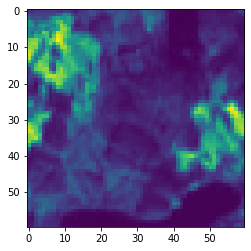

In [ ]:
plt.imshow(rescale(temp,1))

In [ ]:
rescale(temp,1).min()

1.5259021896762436e-05

In [ ]:
for ff in tqdm.tqdm(os.listdir('./data/BigEarthNet-v1.0')):
    cmd='mv '+'./data/BigEarthNet-v1.0/'+ff+'/*_B??.tif ./data/Bigrawdata/'
    os.system(cmd)

In [ ]:
from fastcore.parallel import parallel

In [ ]:
def runcmd(ff):
    cmd='mv '+'./data/BigEarthNet-v1.0/'+ff+'/*_B??.tif ./data/Bigrawdata/'
    os.system(cmd)

In [ ]:
parallel(runcmd,os.listdir('./data/BigEarthNet-v1.0'),progress=True)

(#590326) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
ll=[]
for ff in tqdm.tqdm(os.listdir('./data/BigEarthNet-v1.0')):
    file='./data/BigEarthNet-v1.0/'+ff+'/'+ff+'.tif'
    if os.path.exists(file):
        ll.append(file)

100%|██████████| 590326/590326 [00:36<00:00, 16182.58it/s] 


In [ ]:
df=pd.read_csv('./data/file.csv')

In [ ]:
newdf=pd.DataFrame({'fname':ll})

In [ ]:
newdf['Isval']=0

In [ ]:
newdf['label']=0

Index(['fname', 'Isval', 'label'], dtype='object')